In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import scipy
import scipy.misc
import natsort
import cv2

## Load data

In [3]:
"../data/mass_roads"
def load_path(data_dir):
    #store filenames
    filenames = os.listdir(os.path.join(data_dir))
    filenames = natsort.natsorted(filenames)
    
    #store file path
    filenames_dir = [os.path.join(os.path.join(data_dir), f) for f in filenames]
    return filenames, filenames_dir

In [4]:
image_names, image_dir = load_path("../data/mass_roads/test_split_pred")

## Get list of original image names

In [5]:
image_names_unique_parent = [parent.split("_")[:-1] for parent in image_names]
image_names_unique_parent = natsort.natsorted(list(set(["_".join(parent) for parent in image_names_unique_parent])))

## merge images

In [6]:
range_per_image = len(image_names)/len(image_names_unique_parent)

In [7]:
range_per_image

8100.0

In [8]:
img = np.zeros([int(np.sqrt(range_per_image))*16,int(np.sqrt(range_per_image))*16])
print(img.shape)

(1440, 1440)


/home/alterith/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


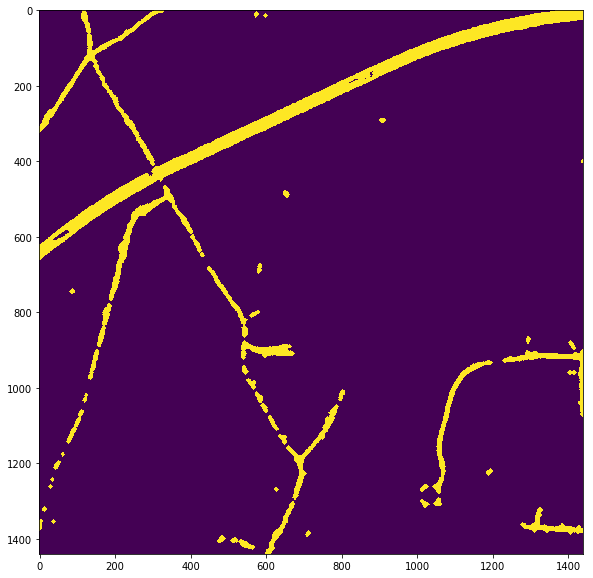

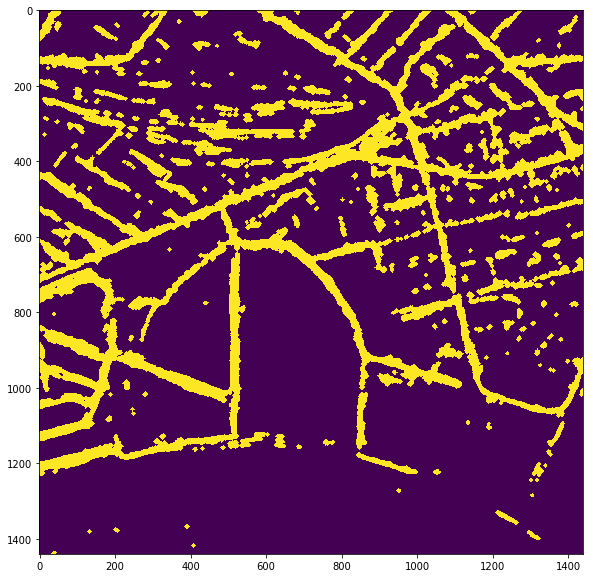

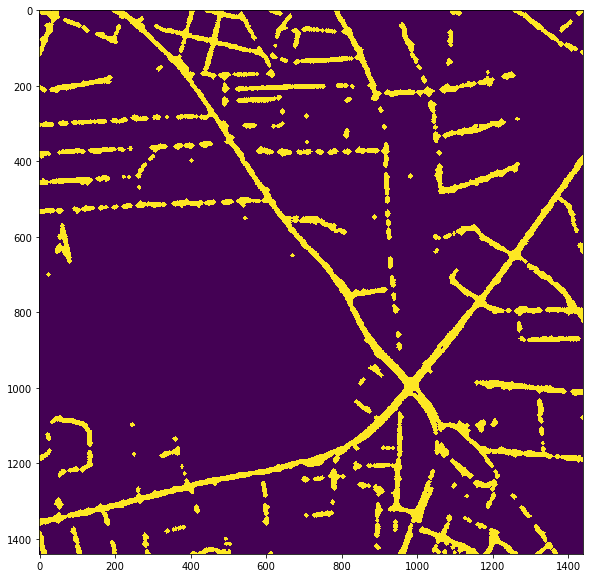

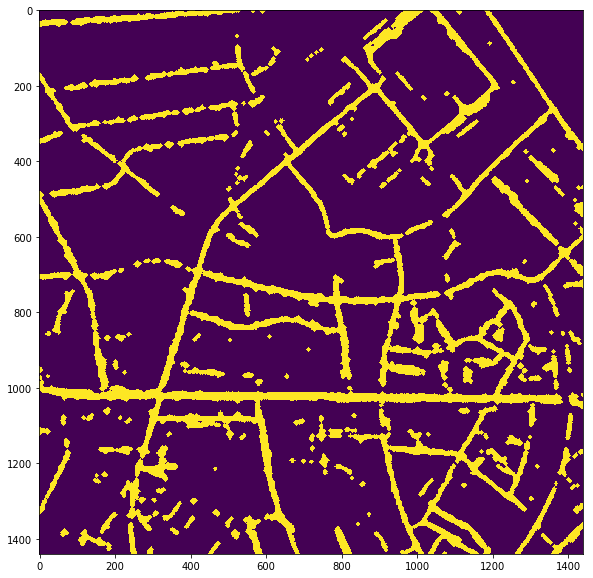

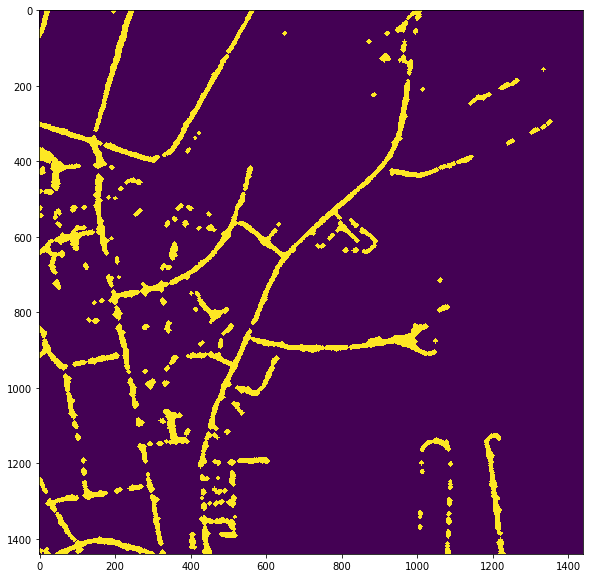

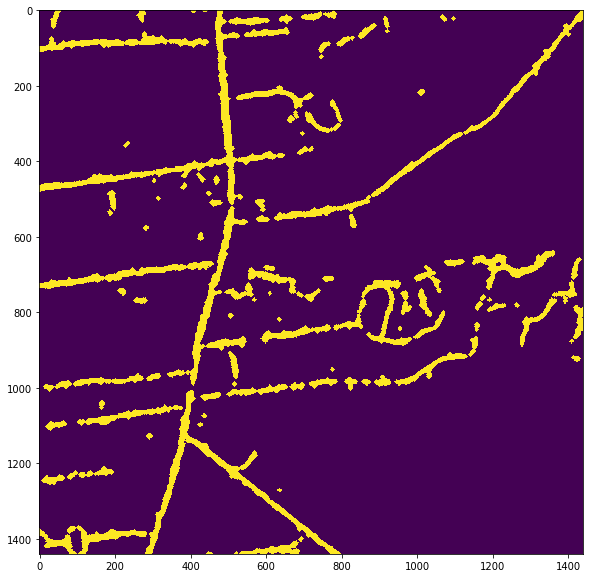

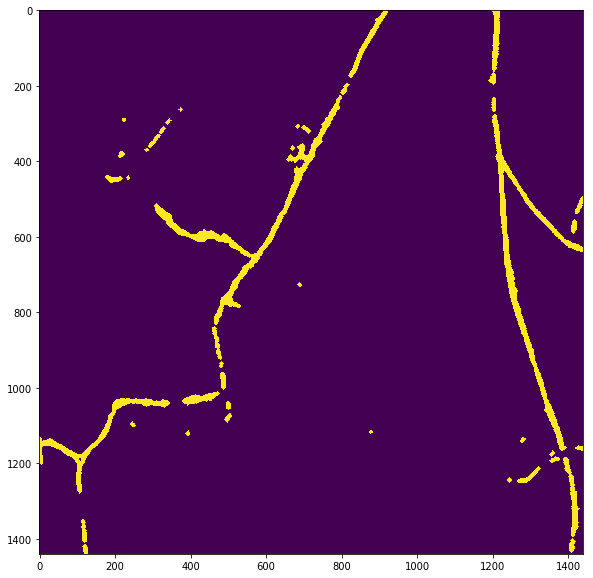

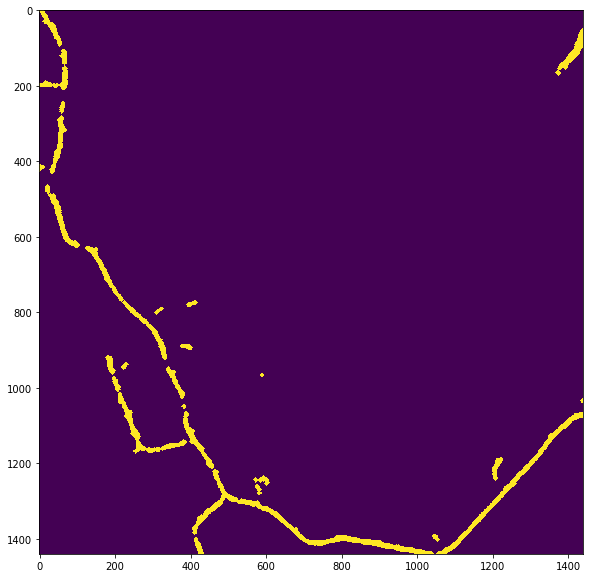

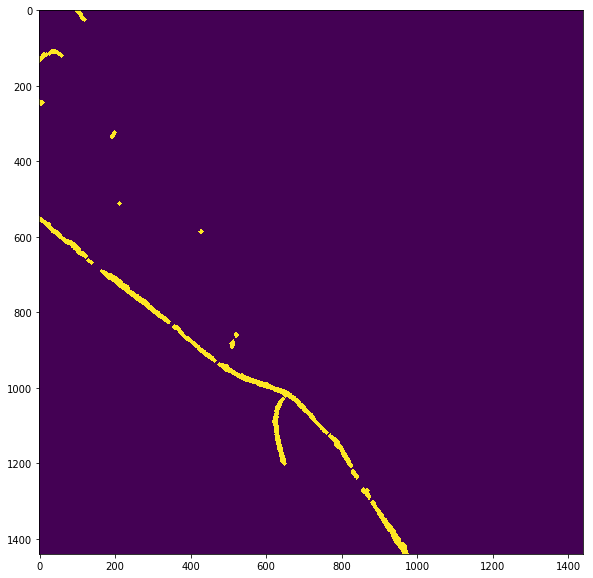

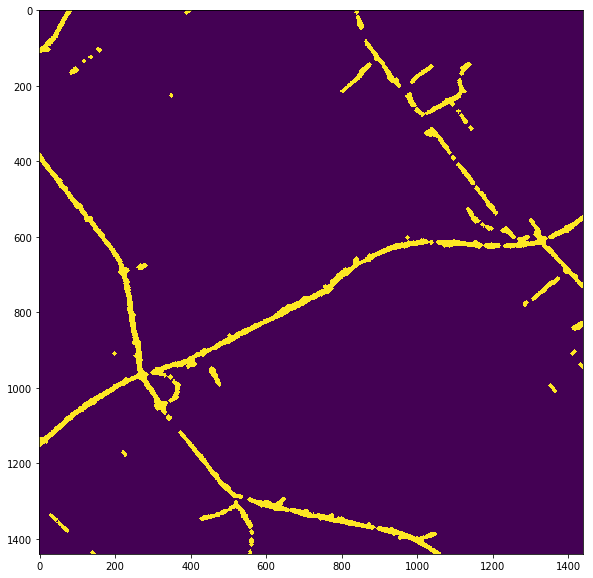

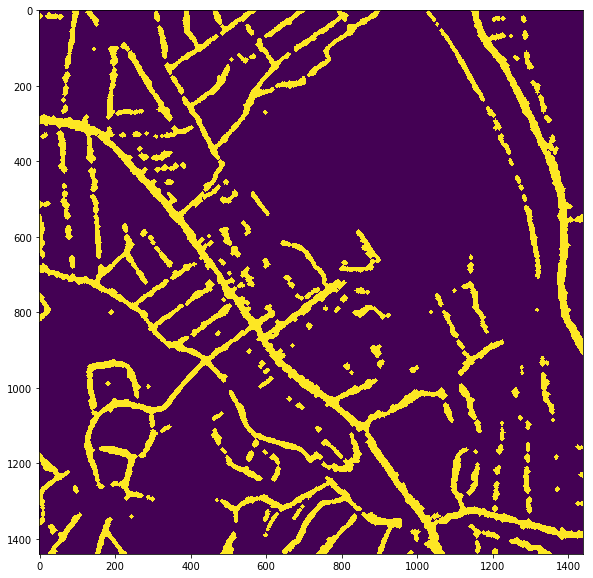

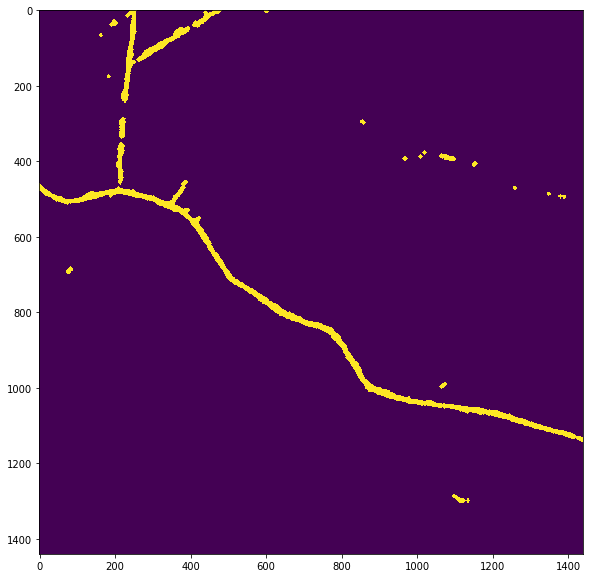

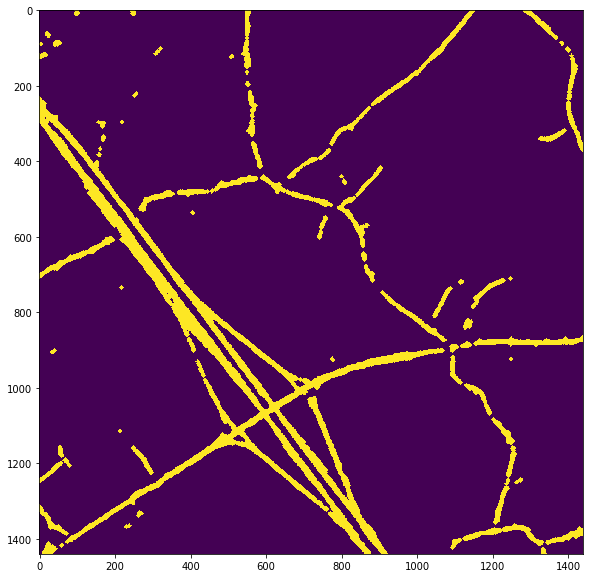

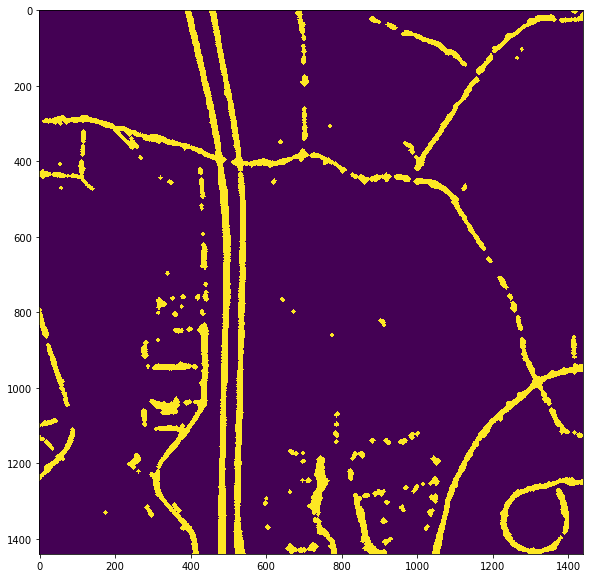

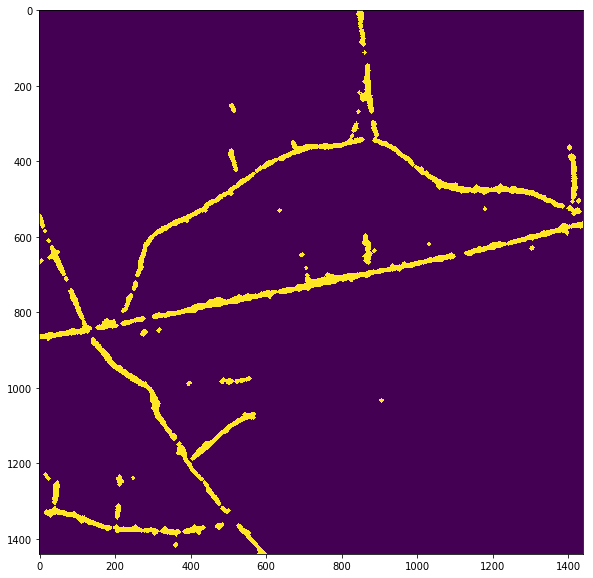

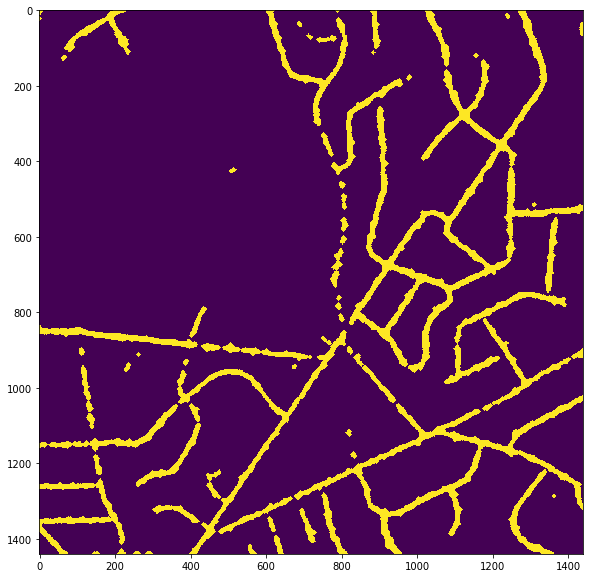

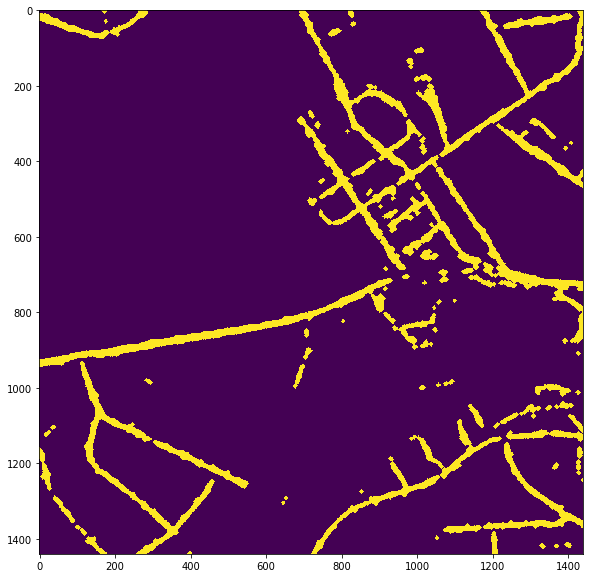

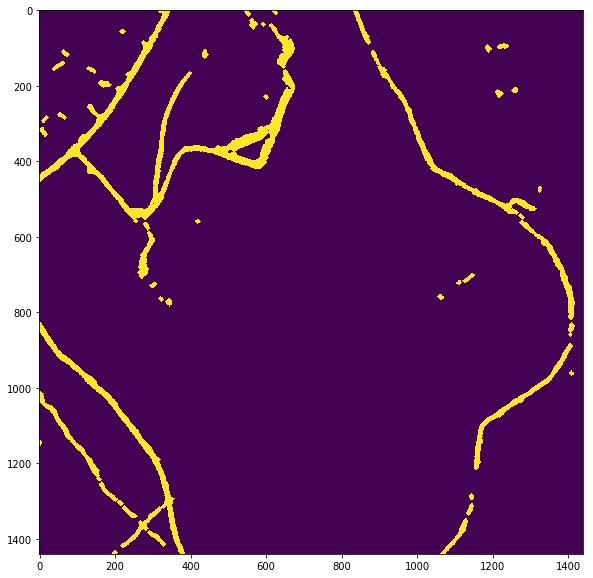

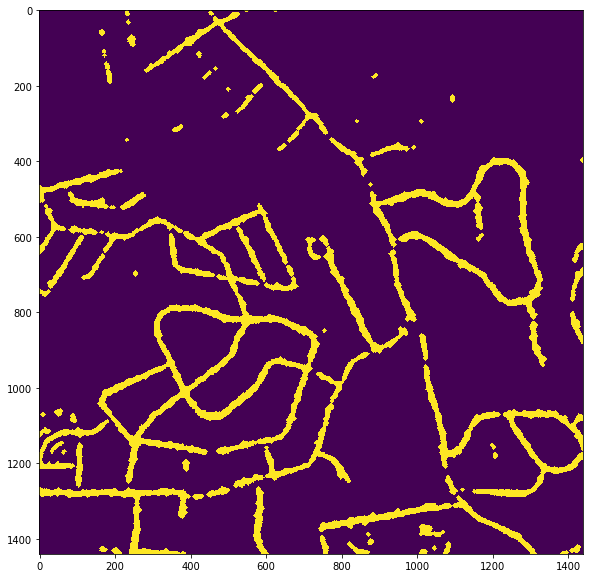

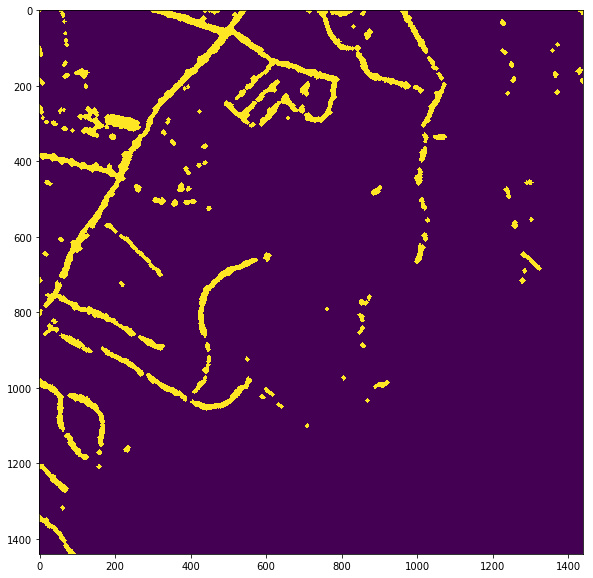

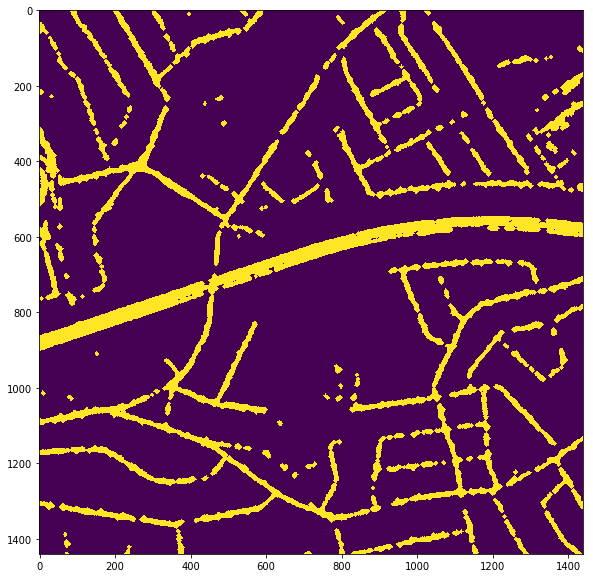

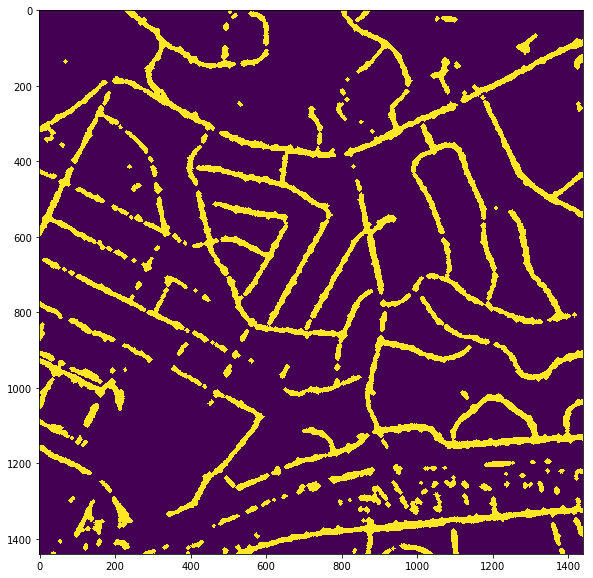

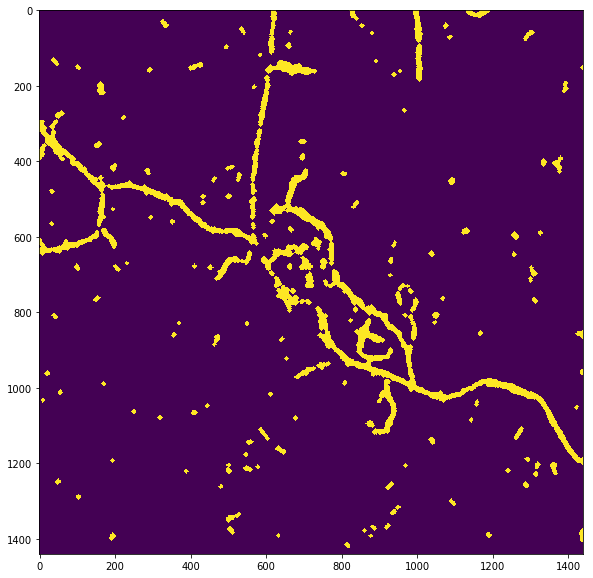

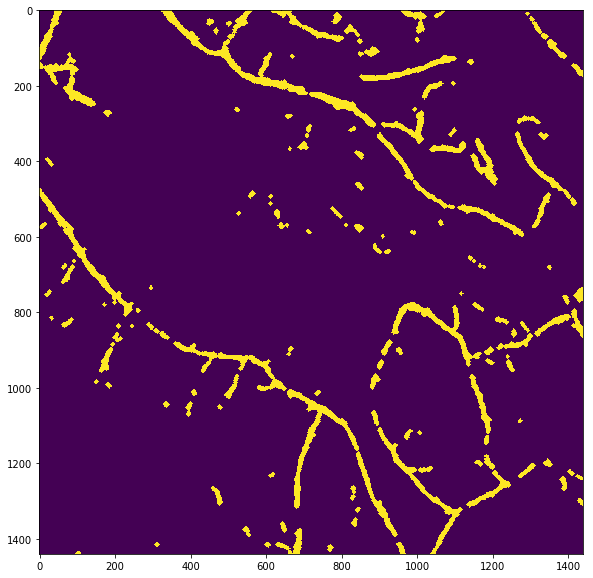

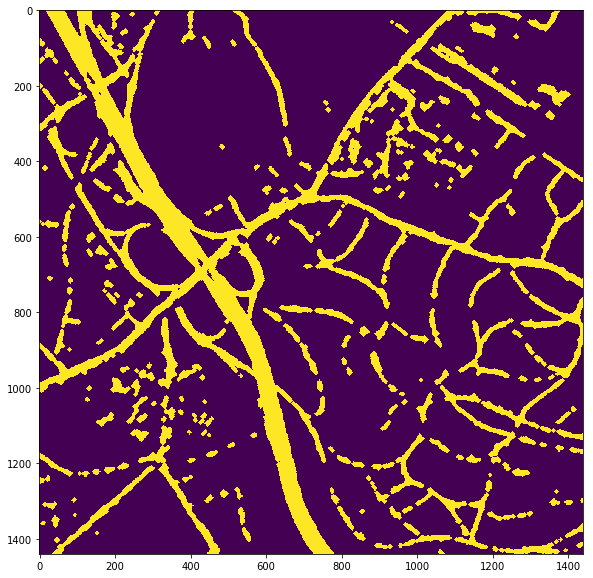

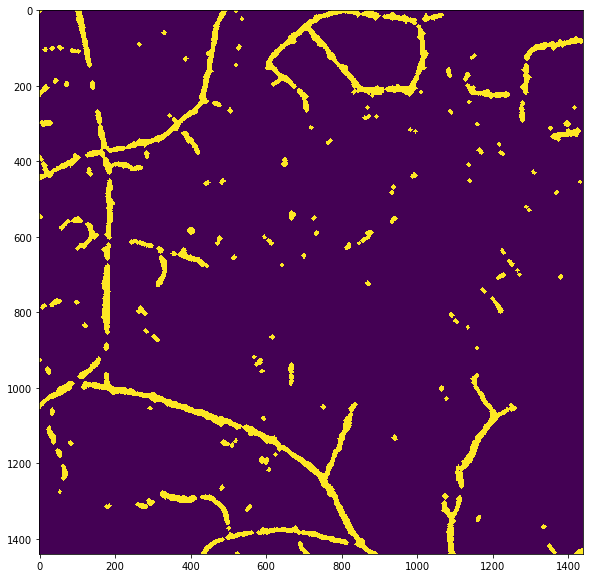

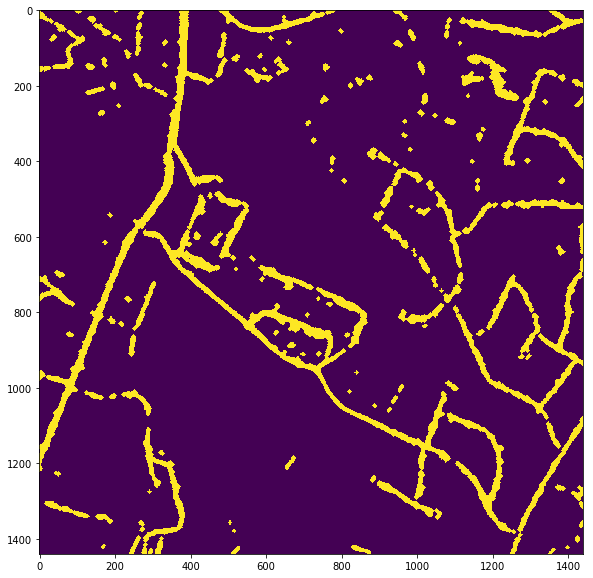

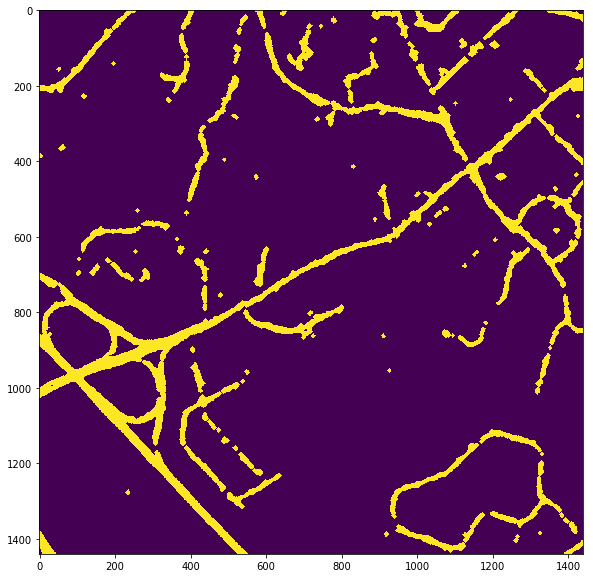

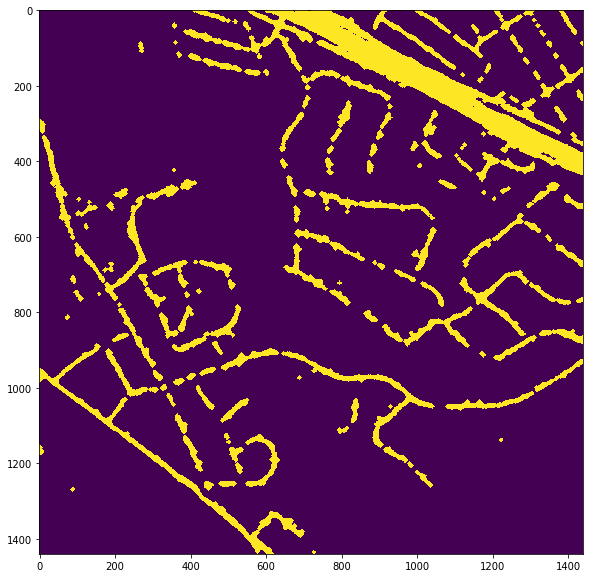

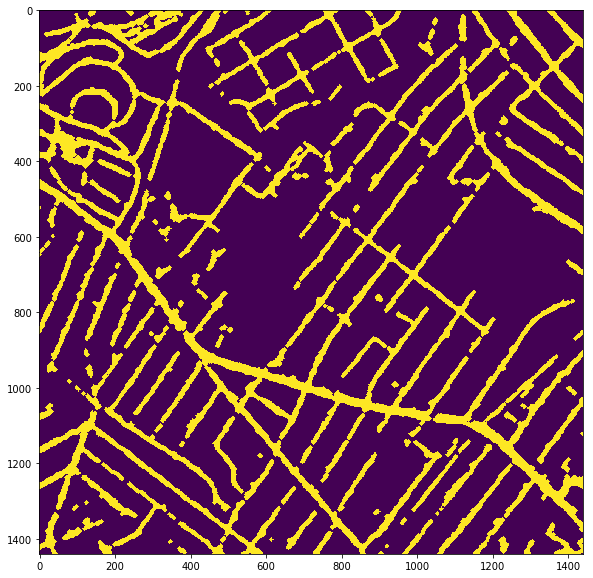

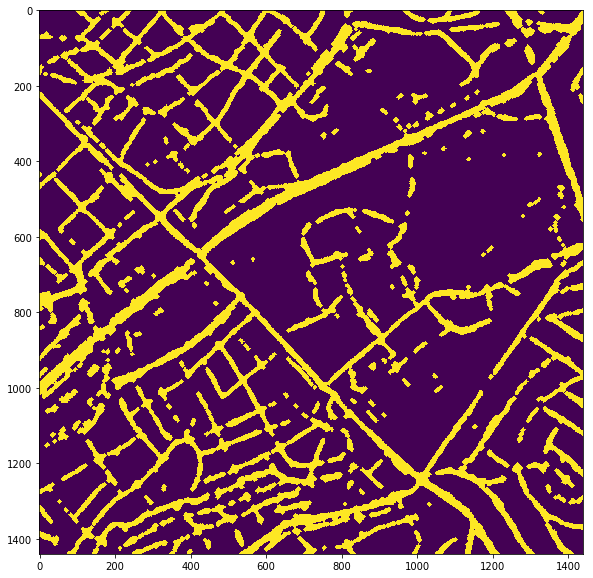

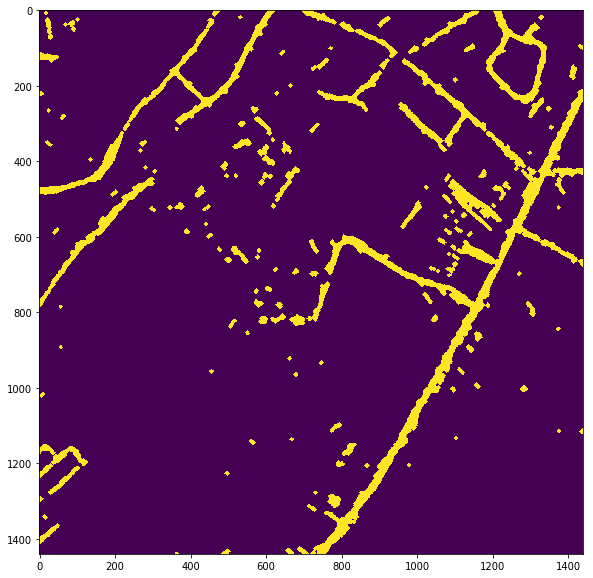

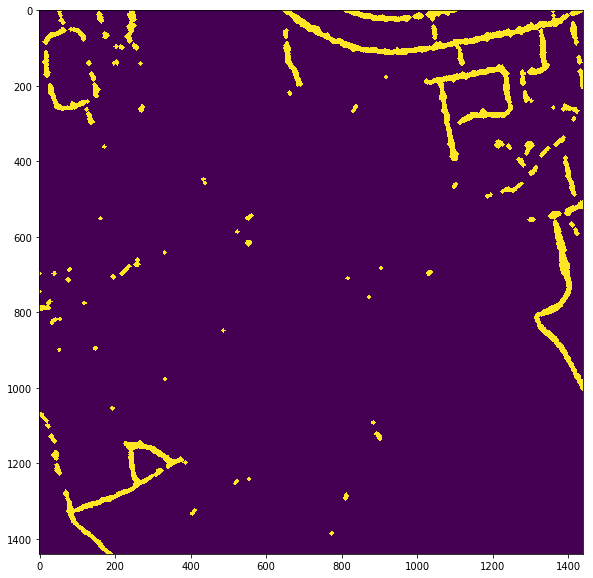

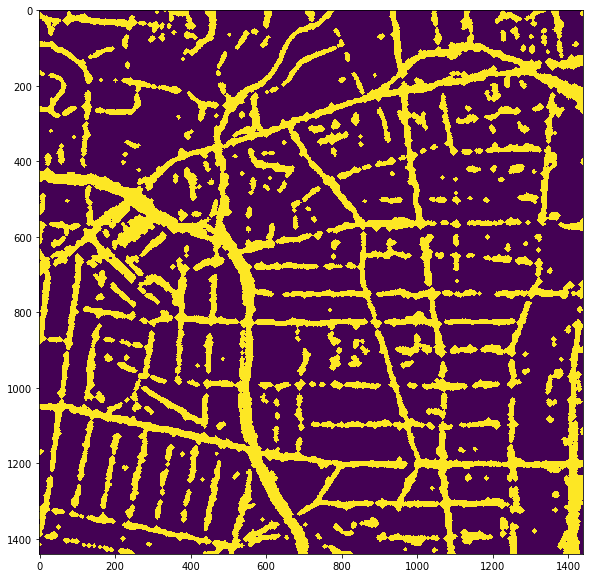

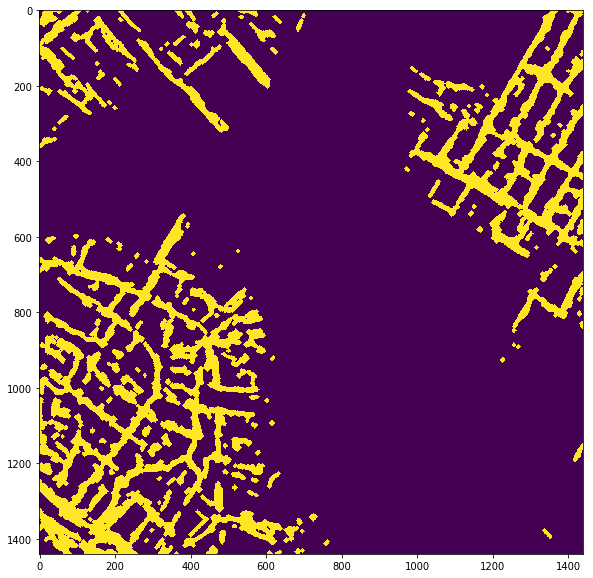

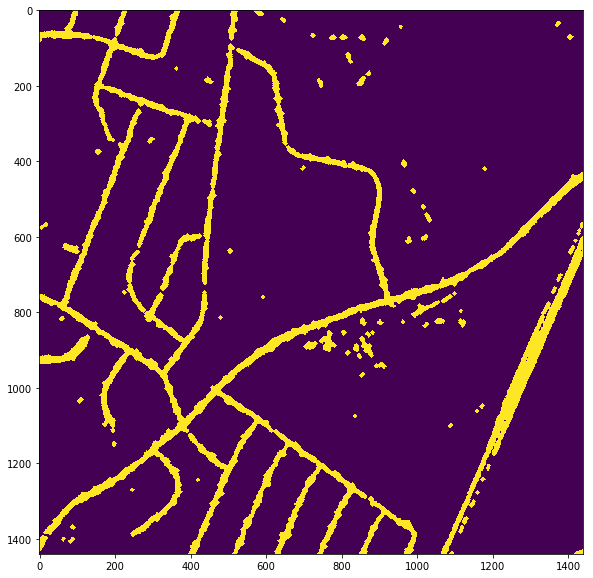

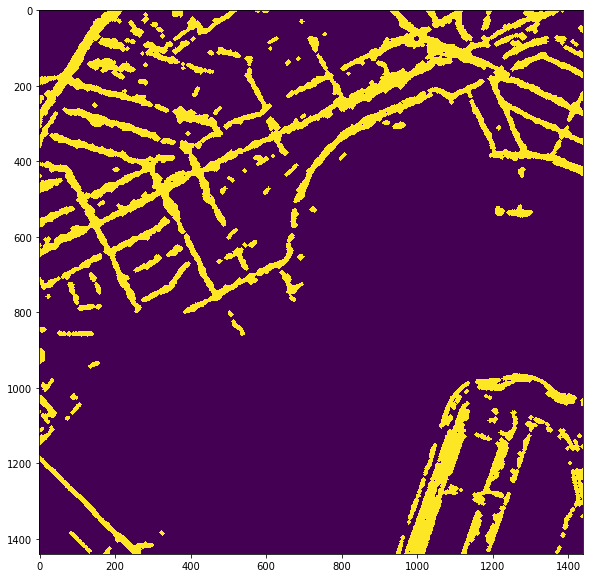

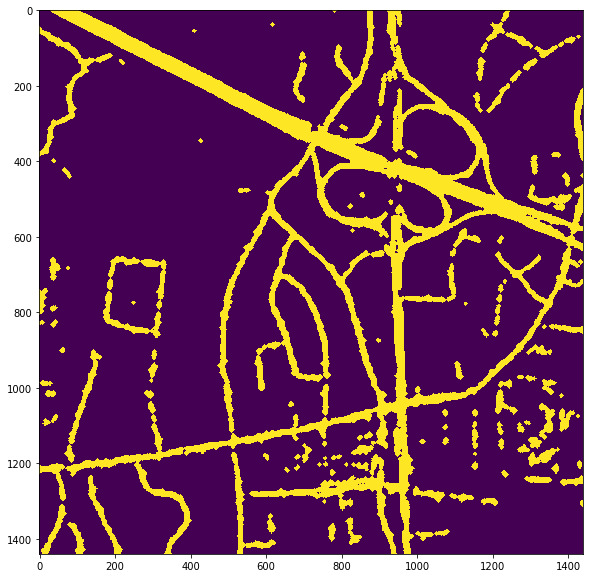

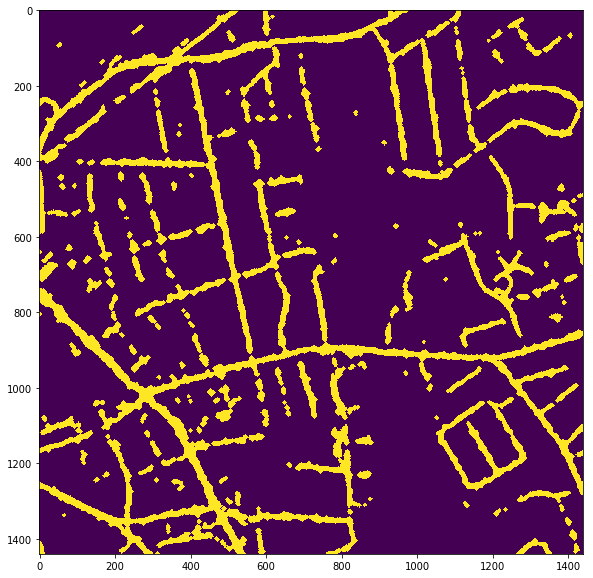

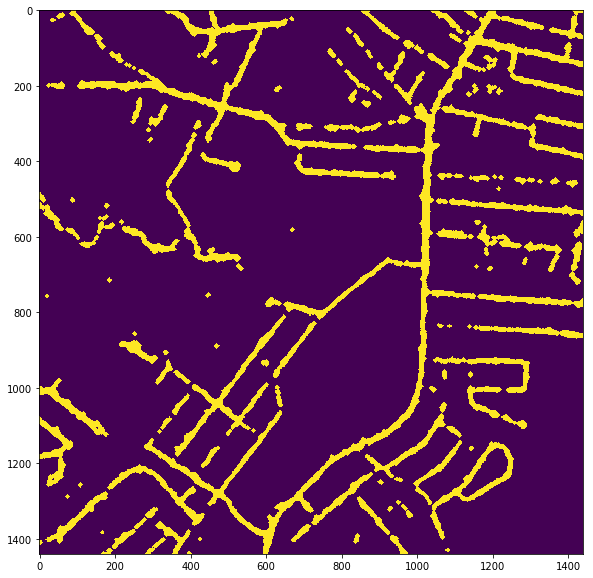

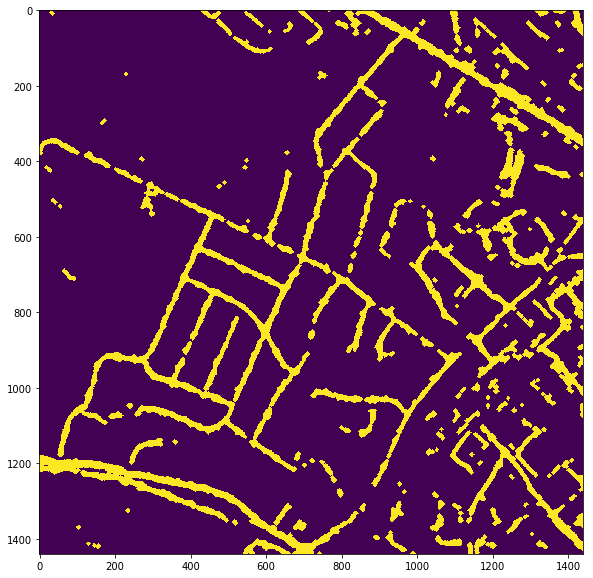

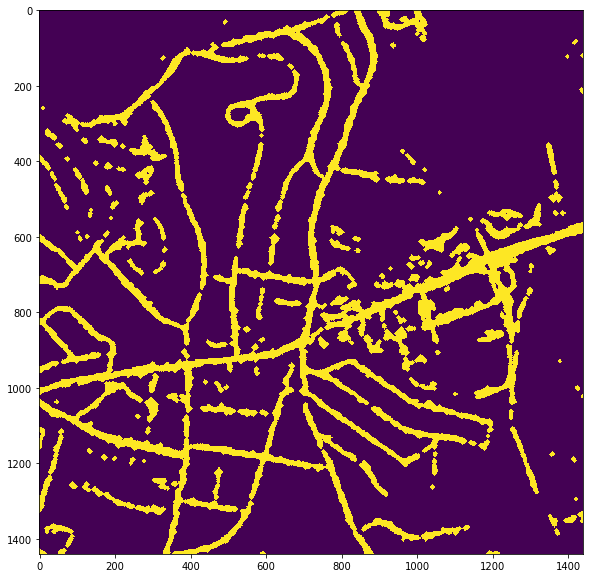

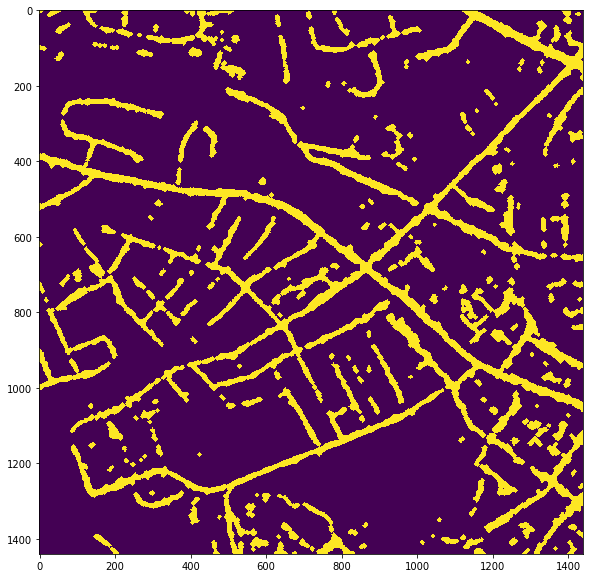

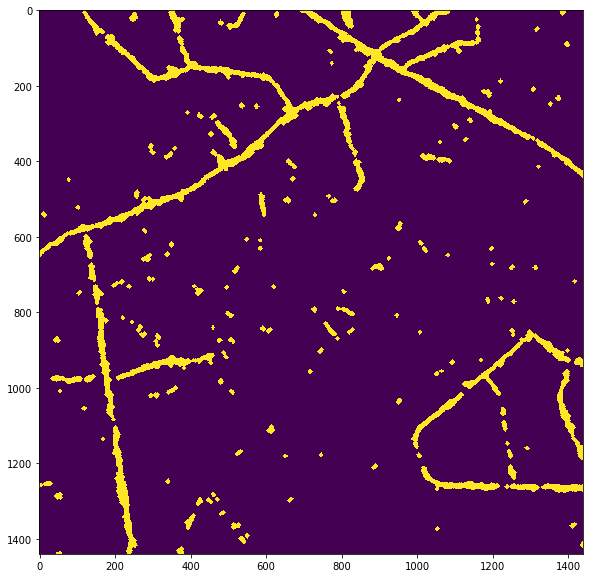

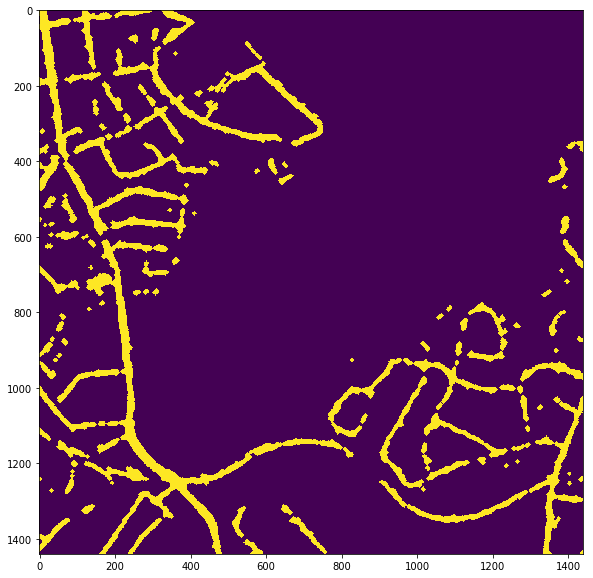

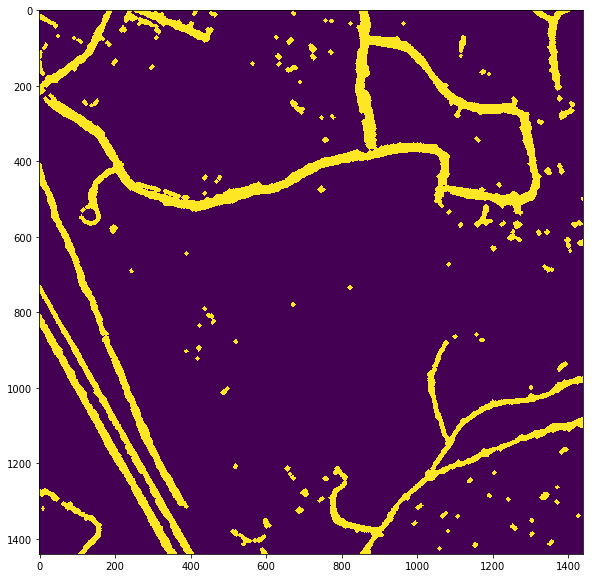

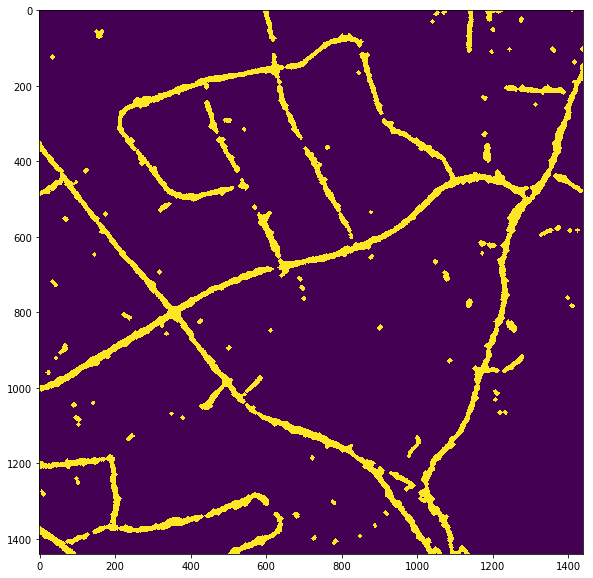

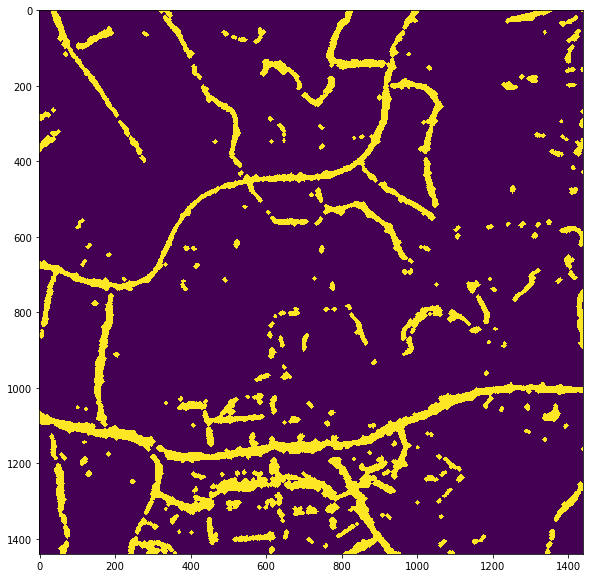

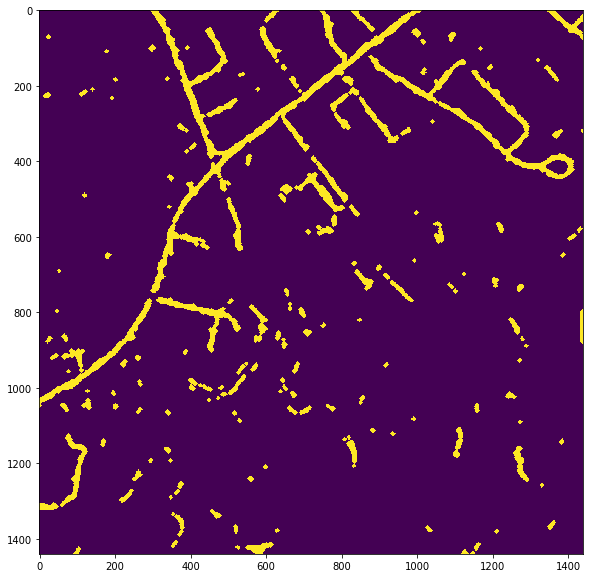

In [14]:
for i in range(0, len(image_names_unique_parent)):
    image_num = i*int(range_per_image)
    img = np.zeros([int(np.sqrt(range_per_image))*16,int(np.sqrt(range_per_image))*16])
    for idx_i in range(0, int(np.sqrt(range_per_image))*16, 16):
        for idx_j in range(0, int(np.sqrt(range_per_image))*16, 16):
            image_pil = Image.open(image_dir[image_num])
            image_numpy = np.array(image_pil)
            img[idx_i:idx_i+16,idx_j:idx_j+16] = image_numpy
            image_num = image_num + 1
    
    #kernel = np.ones((5,5), np.uint8)
    kernel = np.array([[0,0,1,0,0],[0,1,1,1,0],[1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]], np.uint8)
    #img = cv2.dilate(img, kernel, iterations=1)
    kernel = np.array([[0,0,0,1,0,0,0],[0,0,1,1,1,0,0],[0,1,1,1,1,1,0],[1,1,1,1,1,1,1],[0,1,1,1,1,1,0],[0,0,1,1,1,0,0],[0,0,0,1,0,0,0]], np.uint8)
    img = cv2.erode(img, kernel, iterations=2)
    img = cv2.dilate(img, kernel, iterations=2)
    #img = cv2.filter2D(img,-1,kernel)
    #img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    img[img > 0] = 255
    
    cv2.imwrite("../data/mass_roads/test_pred/"+str(image_names_unique_parent[i])+".png", img)
    #im = Image.fromarray(img, mode='L') # RGB
    #im.save("../data/mass_roads/test_pred/"+str(image_names_unique_parent[i])+".tiff", "TIFF")
    plt.figure(i, figsize=(10,10))
    plt.imshow(img)
            

In [ ]:
test = np.linspace(0,10,9)

In [ ]:
test2 = np.array([test,test,test,test])

In [ ]:
print(test2[1,8])

In [ ]:
print(np.unique(img))

In [ ]:
np.array([[0,0,1,0,0],[0,1,1,1,0],[1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]])

In [ ]:
np.ones((5,5), np.uint8)